In [117]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

import warnings
warnings.simplefilter('ignore')

# Importing Data

> Importing data into CSV file from the database may sometime lead to loss of data type and corruption of data. Most common reason would be presence of 'comma' character in the data. Double check your data for any irregularities.

In [95]:
df = pd.read_pickle("C:\Git Repos\OPIMLBoot\wowpickle.pkl")
# Picking 73,000 records randomly as the data set is very big. Dont use the following line while doing proper analysis.
df = df.sample(73000)

In [96]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  73000
Columns:  246


### Dropping duplicates (if any)

In [97]:
print("Before dropping duplicates: ")
print("")
print(df.info())
print("")
print("After dropping duplicates(if any): ")
print("")
df6 = df.drop_duplicates()
print(df6.info())
df = df6.copy()

Before dropping duplicates: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73000 entries, 277602 to 138006
Columns: 246 entries, COBBATCHID to UHGPrimacy
dtypes: float64(19), int64(6), object(221)
memory usage: 137.6+ MB
None

After dropping duplicates(if any): 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73000 entries, 277602 to 138006
Columns: 246 entries, COBBATCHID to UHGPrimacy
dtypes: float64(19), int64(6), object(221)
memory usage: 137.6+ MB
None


## Description of the data - Statistics

### Converting columns that have textual data to upper case.

In [98]:
# Converting column values to upper case
for item in df.columns:
    if df[item].dtype == 'object':
        df[item] = df[item].str.upper()

In [99]:
df.sample(5)

COBBATCHID       SRID      MBRKEY  \
390686  SEGCOMPCSPTPLACPTD_20180328       None   512057100   
240022        ALGOCSPQUERY_20180215       None   405342250   
369670   ALGTTRMRCOVERIFY_120180321     904870    87263510   
151762        CBMUNTEOBCOB_20180202       None   304245779   
344825       CAQHDETFIUNET_20180315  691056287   326109961   

                                   MEMBERID FIRSTNAME    LASTNAME        SSN  \
390686                            112321953     PIPER  ESCHBERGER  605620458   
240022                            109929505   MICHAEL       GOERS  550895112   
369670              GSO07127200853900248000    JACKIE     ABSHIRE  853900248   
151762  00072958900072958900519985099001SPT   DEBORAH     NAILLON  530926025   
344825  0061680030001W571900258119753001SPT    AMANDA       TYSON  260591762   

               DOB GENDER RELCODE     FAMILYID  CARDCODEALT FUNDINGTYPE  \
390686  1992-12-05      F    None    543925307         None        None   
240022  1971-08-20      M    None    D92418001         None        None   
369670  1942-02-21      M    None  00853900248         None        None   
151762  1971-10-02      F      SP  00519985099  00978136169           F   
344825  1978-12-10      F      SP  00258119753  00948016719           F   

       WORKINGSTATUS  GROUPCODE  \
390686          None     TXSTPL   
240022          None      IAQHP   
369670          None  GSO071272   
151762             A  000729589   
344825             A  0001W5719   

                                                GROUPNAME        ADDRESSLINE1  \
390686                                     TEXAS STARPLUS        309 N 2ND ST   
240022                           IOWA QUALITY HEALTH PLAN       202 WALNUT ST   
369670                       AARP MEDICARECOMPLETE PLAN 1  230 DIZZIE LANE NW   
151762  SHEET METAL WORKERS' HEALTH PLAN OF SOUTHERN C...     333 ARTIST VIEW   
344825                     STORM SERVICES ENGINEERING LLC  334 HORSESHOE BEND   

       ADDRESSLINE2            CITY STATE    ZIP HOMEPHONENUM ALTPHONENUMBER  \
390686         None          TEMPLE    TX  76501         None           None   
240022         None         CHELSEA    IA  52215   3198264051           None   
369670         None  CHRISTIANSBURG    VA  24073         None           None   
151762         None      WELLINGTON    NV  89444  07759809724    00000000000   
344825         None           CAIRO    GA  39828  02293775989           None   

       EMAIL FEEDBACKCD MEDICALFINANCIALPRODUCT MEDICALLEGALENTITY GATEDHMO  \
390686  None       None                    None               None     None   
240022  None       None                    None               None     None   
369670  None       None                   00952              02020     None   
151762  None          T                    None               None     None   
344825  None          P                    None               None     None   

       ORIGINALEFFECTIVEDATE                                SUBID  \
390686            2017-03-01                            112321953   
240022            2016-04-01                            109929505   
369670            2018-01-01              GSO07127200853900248000   
151762                  None  00072958900072958900519985099001EET   
344825            2018-01-01  0061680030001W571900258119753001EET   

       SUBFIRSTNAME SUBLASTNAME     SUBSSN      SUBDOB  SUBADDRESSLINE1  \
390686        PIPER  ESCHBERGER  605620458  1992-12-05     309 N 2ND ST   
240022      MICHAEL       GOERS  550895112  1971-08-20    202 WALNUT ST   
369670       JACKIE     ABSHIRE  853900248  1942-02-21             None   
151762          LEE     NAILLON  519985099  1965-03-23  333 ARTIST VIEW   
344825         JACK       TYSON  258119753  1970-12-01             None   

       SUBADDRESSLINE2     SUBCITY SUBSTATE SUBZIP SUBHOMEPHONENUM  \
390686            None      TEMPLE       TX  76501            None   
240022            None     CHELSEA       IA  52215      3198

### Target value analysis
##### Replace 'UHGPrimacy' with column name of your target feature, to get data break down for each class of your target feature.

1    44935
2    27967
3       98
Name: UHGPrimacy, dtype: int64


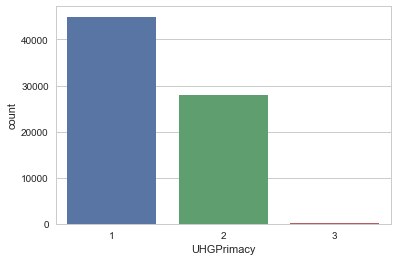

In [100]:
print(df.UHGPrimacy.value_counts())
ax = sns.countplot(df.UHGPrimacy,label="Count")

##### If the problem is a regression problem i.e. we have to predict a continous variable like house price, then the following graph would be more useful

count    73000.000000
mean         1.385795
std          0.489536
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: UHGPrimacy, dtype: float64


C:\Users\dyadav41\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


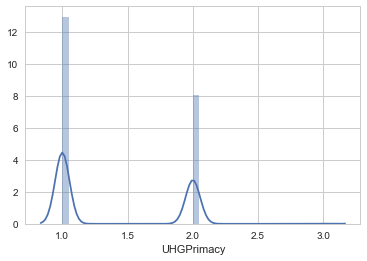

In [101]:
print(df.UHGPrimacy.describe())
sns.distplot(df.UHGPrimacy)

## Now, we will look at other features in the dataset and get a high level understanding of what kind of data they hold.

#### Below is a table giving a brief description about the variance of data in each column.

In [102]:
new_df = pd.DataFrame(columns=['ColumnName', 'Null_Count_%', 'Distinct_Values', 'Min', 'Mean', 'Max', 'dtype'])
i = 0
#print(df.shape[0])
for item in df.columns:
    if(df[item].dtype == 'object'):
        new_df.loc[i] = [item, df[item].isnull().sum()/df.shape[0] * 100, df[item].nunique(), "Na", "Na", "Na", df[item].dtype]
    else:
        new_df.loc[i] = [item, df[item].isnull().sum()/df.shape[0] * 100, df[item].nunique(), df[item].min(), df[item].mean(), df[item].max(), df[item].dtype]
    
    i=i+1
print("Column Information: ")
new_df

Column Information: 


ColumnName  Null_Count_% Distinct_Values          Min  \
0                      COBBATCHID      0.000000            2340           Na   
1                            SRID     75.404110           17901           Na   
2                          MBRKEY     13.608219           62477           Na   
3                        MEMBERID      0.000000           72315           Na   
4                       FIRSTNAME      0.000000           12685           Na   
5                        LASTNAME      0.000000           30840           Na   
6                             SSN      2.331507           66281           Na   
7                             DOB      0.009589           27699           Na   
8                          GENDER      0.816438               3           Na   
9                         RELCODE     24.347945              48           Na   
10                       FAMILYID      0.000000           70578           Na   
11                    CARDCODEALT     55.619178           31876           Na   
12                    FUNDINGTYPE     49.012329               7           Na   
13                  WORKINGSTATUS     46.297260              14           Na   
14                      GROUPCODE      0.160274           26127           Na   
15                      GROUPNAME      3.213699           24285           Na   
16                   ADDRESSLINE1      3.591781           67123           Na   
17                   ADDRESSLINE2     94.252055            2909           Na   
18                           CITY      3.591781            8981           Na   
19                          STATE      3.602740              53           Na   
20                            ZIP      3.584932           20039           Na   
21                   HOMEPHONENUM     17.149315           40657           Na   
22                 ALTPHONENUMBER     78.413699            3935           Na   
23                          EMAIL     99.919178              58           Na   
24                     FEEDBACKCD     57.172603               2           Na   
25        MEDICALFINANCIALPRODUCT     92.730137              86           Na   
26             MEDICALLEGALENTITY     92.730137              95           Na   
27                       GATEDHMO    100.000000               0           Na   
28          ORIGINALEFFECTIVEDATE     47.004110            1910           Na   
29                          SUBID      4.493151           67831           Na   
30                   SUBFIRSTNAME      4.671233           11337           Na   
31                    SUBLASTNAME      4.676712           29868           Na   
32                         SUBSSN     10.860274           60792           Na   
33                         SUBDOB      8.449315           24531           Na   
34                SUBADDRESSLINE1     35.001370           45007           Na   
35                SUBADDRESSLINE2     94.405479            3119           Na   
36                        SUBCITY     35.105479            7408           Na   
37                       SUBSTATE     32.915068              52           Na   
38                         SUBZIP     32.906849           17458           Na   
39                SUBHOMEPHONENUM     62.413699           20268           Na   
40                SUBWORKPHONENUM     97.204110            1199           Na   
41                   SUBGROUPCODE     23.358904           18975           Na   
42                   SUBGROUPNAME     28.539726           17894           Na   
43                      SUBGENDER     10.246575               3           Na   
44       SUBSCRIBERRETIREMENTDATE     90.049315               4           Na   
45                       SPOUSEID     90.439726            6895           Na   
46                 CONTRACTNUMBER     79.263014             112           Na   
47               CONTRACTFROMDATE      3.364384            1671           Na   
48               CONTRACTTHRUDATE     20.557534             474           Na   
49                   DI

#### List of column that have more than 60% null values. General recommendation is to drop columns that contain more than 60% null value

In [103]:
# removing column with large number of missing values
count = 0
dropped_index = []
#print(df.isnull().sum())
dropped_columns = pd.DataFrame(columns=['ColumnName', 'Null_Count_%', 'Distinct_Values', 'Min', 'Mean', 'Max', 'dtype'])
for index, row in new_df.iterrows():
    null_count = row['Null_Count_%']
    if null_count > 60.0:
        count = count + 1
        df = df.drop(columns=[row['ColumnName']])
        dropped_columns = dropped_columns.append(row, ignore_index=True)
        dropped_index.append(index)
        #new_df.drop(new_df.index[[index]], inplace=True)
        
new_df.drop(dropped_index, inplace=True)
print("Number of Features Eliminated: ", count)
print("Eliminated Columns: ")
dropped_columns

Number of Features Eliminated:  188
Eliminated Columns: 


ColumnName  Null_Count_% Distinct_Values          Min  \
0                            SRID     75.404110           17901           Na   
1                    ADDRESSLINE2     94.252055            2909           Na   
2                  ALTPHONENUMBER     78.413699            3935           Na   
3                           EMAIL     99.919178              58           Na   
4         MEDICALFINANCIALPRODUCT     92.730137              86           Na   
5              MEDICALLEGALENTITY     92.730137              95           Na   
6                        GATEDHMO    100.000000               0           Na   
7                 SUBADDRESSLINE2     94.405479            3119           Na   
8                 SUBHOMEPHONENUM     62.413699           20268           Na   
9                 SUBWORKPHONENUM     97.204110            1199           Na   
10       SUBSCRIBERRETIREMENTDATE     90.049315               4           Na   
11                       SPOUSEID     90.439726            6895           Na   
12                 CONTRACTNUMBER     79.263014             112           Na   
13                   DIVISIONCODE     95.613699              24           Na   
14                ELIGIBILITYTYPE     94.454795               3           Na   
15              FIRSTDIALYSISDATE     99.952055              32           Na   
16             COBRAEFFECTIVEDATE     99.932877              19           Na   
17                            HIC     83.328767           12046           Na   
18           COBRATERMINATIONDATE    100.000000               0           Na   
19                            LOB     62.406849             237           Na   
20                        LOBDESC     99.194521              78           Na   
21               RETIREEINDICATOR    100.000000               0           Na   
22                           GUID    100.000000               0           Na   
23                 RETIREMENTDATE     88.031507              53           Na   
24                   DOLLARAMOUNT     62.395890           10460       -16899   
25          RETIREEEXPIRATIONDATE    100.000000               0           Na   
26                          CLAIM     87.164384            9366           Na   
27                      DIAGNOSIS     98.601370             475           Na   
28                       HASCOBRA     99.902740               1            1   
29                          HASBH    100.000000               0           Na   
30          HASGOVERNMENTCOVERAGE    100.000000               0           Na   
31                    COMMENTSEXT     96.295890             729           Na   
32                         AUTHNO     74.589041              12           Na   
33              INVENTORYCOBSCORE     95.473973             167            1   
34                      BHCARRIER    100.000000               0           Na   
35        BHCOVERAGEEFFECTIVEDATE    100.000000               0           Na   
36      BHCOVERAGETERMINATIONDATE    100.000000               0           Na   
37           BHCOVERAGECOBENDDATE    100.000000               0           Na   
38         BHCOVERAGECOBSTARTDATE    100.000000               0           Na   
39               MEDICAREAEFFDATE     85.710959             461           Na   
40              MEDICAREATERMDATE     98.754795             130           Na   
41               MEDICAREBEFFDATE     89.401370             450           Na   
42              MEDICAREBTERMDATE     98.968493             193           Na   
43               MEDICAREDEFFDATE     96.017808             142           Na   
44           MEDICARE_D_TERM_DATE     99.541096             139           Na   
45                  OICARRIERCODE     97.775342             139           Na   
46                  OICARRIERNAME     60.805479            2080           Na   
47                    OIMBRSYSKEY     95.028767            3629  8.75794e+07   
48                   OIOTHEREMPID     93.030137            3387           Na   
49                     

#### Encoding and Filling missing values
> We have divided the data into three categories: <br>
- Numerical
- Textual/Categorical
- Date

##### Sorting columns into their respective category

In [104]:
# sorting into categorical and numerical list using dtype i.e. data type of the column
categorical_list = []
numerical_list = []
for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)

print('Number of categorical features:', str(len(categorical_list)))

new_df[new_df.ColumnName.isin(categorical_list)]


Number of categorical features: 50


ColumnName  Null_Count_% Distinct_Values Min Mean Max   dtype
0               COBBATCHID      0.000000            2340  Na   Na  Na  object
2                   MBRKEY     13.608219           62477  Na   Na  Na  object
3                 MEMBERID      0.000000           72315  Na   Na  Na  object
4                FIRSTNAME      0.000000           12685  Na   Na  Na  object
5                 LASTNAME      0.000000           30840  Na   Na  Na  object
6                      SSN      2.331507           66281  Na   Na  Na  object
7                      DOB      0.009589           27699  Na   Na  Na  object
8                   GENDER      0.816438               3  Na   Na  Na  object
9                  RELCODE     24.347945              48  Na   Na  Na  object
10                FAMILYID      0.000000           70578  Na   Na  Na  object
11             CARDCODEALT     55.619178           31876  Na   Na  Na  object
12             FUNDINGTYPE     49.012329               7  Na   Na  Na  object
13           WORKINGSTATUS     46.297260              14  Na   Na  Na  object
14               GROUPCODE      0.160274           26127  Na   Na  Na  object
15               GROUPNAME      3.213699           24285  Na   Na  Na  object
16            ADDRESSLINE1      3.591781           67123  Na   Na  Na  object
18                    CITY      3.591781            8981  Na   Na  Na  object
19                   STATE      3.602740              53  Na   Na  Na  object
20                     ZIP      3.584932           20039  Na   Na  Na  object
21            HOMEPHONENUM     17.149315           40657  Na   Na  Na  object
24              FEEDBACKCD     57.172603               2  Na   Na  Na  object
28   ORIGINALEFFECTIVEDATE     47.004110            1910  Na   Na  Na  object
29                   SUBID      4.493151           67831  Na   Na  Na  object
30            SUBFIRSTNAME      4.671233           11337  Na   Na  Na  object
31             SUBLASTNAME      4.676712           29868  Na   Na  Na  object
32                  SUBSSN     10.860274           60792  Na   Na  Na  object
33                  SUBDOB      8.449315           24531  Na   Na  Na  object
34         SUBADDRESSLINE1     35.001370           45007  Na   Na  Na  object
36                 SUBCITY     35.105479            7408  Na   Na  Na  object
37                SUBSTATE     32.915068              52  Na   Na  Na  object
38                  SUBZIP     32.906849           17458  Na   Na  Na  object
41            SUBGROUPCODE     23.358904           18975  Na   Na  Na  object
42            SUBGROUPNAME     28.539726           17894  Na   Na  Na  object
43               SUBGENDER     10.246575               3  Na   Na  Na  object
47        CONTRACTFROMDATE      3.364384            1671  Na   Na  Na  object
48        CONTRACTTHRUDATE     20.557534             474  Na   Na  Na  object
69             COMMENTSINT     37.632877           34654  Na   Na  Na  object
100       OUTPUT_INDICATOR      0.000000               6  Na   Na  Na  object
101              RUN_MONTH      0.000000               6  Na   Na  Na  object
102               RUN_DATE      0.000000             104  Na   Na  Na  object
103                LOAD_DT      0.000000             104  Na   Na  Na  object
104        AMT_LOAD_STATUS      0.000000               2  Na   Na  Na  object
105    AMT_ATTEMPT_LOAD_DT      0.000000              90  Na   Na  Na  object
106     AMT_ACTUAL_LOAD_DT      0.000000              90  Na   Na  Na  object
109        WOW_LOAD_STATUS      0.000000               1  Na   Na  Na  object
110            WOW_LOAD_DT      0.000000              89  Na   Na  Na  object
114            LOAD_METHOD      0.000000               1  Na   Na  Na  object
174           YIELDMODELID     36.295890               2  Na   Na  Na  object
192      NOSSN_DUPS_REVIEW      0.000000               3  Na   Na  Na  object
224      IMACRO_DUP_REVIEW      0.052055               2  Na   Na  Na  object

#### Getting date columns from categorical list. For this we identify patterns that date column have and utilise that to generate our date_list.

In [105]:
date_list = []
new_list2 = []
print("No. of categorical columns before removing date columns: ", len(categorical_list))
for item in categorical_list:
    if item[-4:] == 'DATE' or item[-3:] == '_DT' or item[-3:] == 'DOB':
        date_list.append(item)
    else:
        new_list2.append(item)
    
print("No. of categorical columns after removing date columns: ", len(new_list2))
categorical_list = new_list2

new_df[new_df.ColumnName.isin(date_list)]

No. of categorical columns before removing date columns:  50
No. of categorical columns after removing date columns:  40


ColumnName  Null_Count_% Distinct_Values Min Mean Max   dtype
7                      DOB      0.009589           27699  Na   Na  Na  object
28   ORIGINALEFFECTIVEDATE     47.004110            1910  Na   Na  Na  object
33                  SUBDOB      8.449315           24531  Na   Na  Na  object
47        CONTRACTFROMDATE      3.364384            1671  Na   Na  Na  object
48        CONTRACTTHRUDATE     20.557534             474  Na   Na  Na  object
102               RUN_DATE      0.000000             104  Na   Na  Na  object
103                LOAD_DT      0.000000             104  Na   Na  Na  object
105    AMT_ATTEMPT_LOAD_DT      0.000000              90  Na   Na  Na  object
106     AMT_ACTUAL_LOAD_DT      0.000000              90  Na   Na  Na  object
110            WOW_LOAD_DT      0.000000              89  Na   Na  Na  object

In [106]:
df[date_list].head()

DOB ORIGINALEFFECTIVEDATE      SUBDOB CONTRACTFROMDATE  \
277602  1975-07-12                  None  1975-07-12       2017-12-01   
140417  1985-06-15            2017-12-01  1985-06-15       2017-12-01   
105782  2015-12-08            2017-02-01  2015-12-08       2018-07-01   
55311   2008-01-03            2014-08-01  2008-01-03       2017-09-13   
359817  1987-07-28            2017-01-03  1987-07-28       2017-10-01   

       CONTRACTTHRUDATE  RUN_DATE     LOAD_DT AMT_ATTEMPT_LOAD_DT  \
277602       9999-12-31  20180223  2018-02-23          2018-02-23   
140417       2199-12-31  20180203  2018-02-03          2018-02-03   
105782       2199-12-31  20180126  2018-01-26          2018-01-26   
55311        2199-12-31  20180107  2018-01-07          2018-01-07   
359817       9999-12-31  20180315  2018-03-15          2018-03-15   

       AMT_ACTUAL_LOAD_DT WOW_LOAD_DT  
277602         2018-02-23  2018-02-23  
140417         2018-02-03  2018-02-05  
105782         2018-01-26  2018-01-26  
55311          2018-01-07  2018-01-07  
359817         2018-03-15  2018-03-15

## DATE ENCODING: START

In [107]:
# removing run_date because it's format is different from that of date
date_list.remove('RUN_DATE')
date_list

['DOB',
 'ORIGINALEFFECTIVEDATE',
 'SUBDOB',
 'CONTRACTFROMDATE',
 'CONTRACTTHRUDATE',
 'LOAD_DT',
 'AMT_ATTEMPT_LOAD_DT',
 'AMT_ACTUAL_LOAD_DT',
 'WOW_LOAD_DT']

##### Below is a function that convert dates to their numeric equivalent - for example - 1987-12-20 becomes 19871220. This enables machine learning models to compare date columns and extract useful information

In [108]:
def encode_date_column(x):
    if x == None:
        date = '00000000'
    else:
        year = x[0:4]
        month = x[5:7]
        day = x[8:10]
        date = year+month+day
    return(date)

In [109]:
# applying encoding function to columns present in date list
for item in date_list:
    df[item] = df[item].apply(encode_date_column)


## DATE ENCODING - END

In [110]:
df[date_list].head()

DOB ORIGINALEFFECTIVEDATE    SUBDOB CONTRACTFROMDATE  \
277602  19750712              00000000  19750712         20171201   
140417  19850615              20171201  19850615         20171201   
105782  20151208              20170201  20151208         20180701   
55311   20080103              20140801  20080103         20170913   
359817  19870728              20170103  19870728         20171001   

       CONTRACTTHRUDATE   LOAD_DT AMT_ATTEMPT_LOAD_DT AMT_ACTUAL_LOAD_DT  \
277602         99991231  20180223            20180223           20180223   
140417         21991231  20180203            20180203           20180203   
105782         21991231  20180126            20180126           20180126   
55311          21991231  20180107            20180107           20180107   
359817         99991231  20180315            20180315           20180315   

       WOW_LOAD_DT  
277602    20180223  
140417    20180205  
105782    20180126  
55311     20180107  
359817    20180315

## Encoding categorical values using label encoder. 
## There is other option also "One HOT Encoder" to encode the data but that is computationaly expensive. If we have good resources then One Hot Encoding is good too.

In [111]:
# using label encoder for encoding categorical values
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

#dictionary for storing label encoder for each feature
le_dict = defaultdict(LabelEncoder)

for item in categorical_list:
    df[item] = le_dict[item].fit_transform(df[item].astype(str))

df[categorical_list].sample(5)

COBBATCHID  MBRKEY  MEMBERID  FIRSTNAME  LASTNAME    SSN  GENDER  \
286276        1576   40878     34093       9352     11179  40649       1   
38102         2223   55731     50203       2945     15995  34610       1   
204918         765   19530      7017       2287      4836  44479       1   
191076        1484   44360     35245       4614      5980  34212       0   
375952        1496    6546     31973       7263     20926  12372       0   

        RELCODE  FAMILYID  CARDCODEALT  FUNDINGTYPE  WORKINGSTATUS  GROUPCODE  \
286276       29     30966        31876            5              0      19791   
38102        35     51369        31876            5              9      23502   
204918       40     34141         2284            2             10      10603   
191076       44     39140        31876            5              0      20541   
375952       29      7995        17809            2              0       8351   

        GROUPNAME  ADDRESSLINE1  CITY  STATE    ZIP  HOMEPHONENUM  FEEDBACKCD  \
286276      14937         66669  3740     16   9788             6           0   
38102       10121          7055  7329     19  14427         18498           0   
204918       1828         63217  4213      4  16836          6789           2   
191076       5681         14120  8214     10   6113         34310           0   
375952       6736         45727  8642     37   8255             7           1   

        SUBID  SUBFIRSTNAME  SUBLASTNAME  SUBSSN  SUBADDRESSLINE1  SUBCITY  \
286276  29427          8256        10923   39850            44688     3088   
38102   44540          2524        15547   33539             4647     6037   
204918   5649          1911         4729   43661            42161     3477   
191076  30403          8755         5848   51063             9389     6781   
375952  27654          6353        20282   11913            43549     4732   

        SUBSTATE  SUBZIP  SUBGROUPCODE  SUBGROUPNAME  SUBGENDER  COMMENTSINT  \
286276        15    8411         17860         11523          1        18832   
38102         18   12503         17182          7401          1        33547   
204918         3   14543          7848          1347          1        13627   
191076         9    5242         17860         11523          1        23591   
375952        35   17458          5971          4944          0         1746   

        OUTPUT_INDICATOR  RUN_MONTH  AMT_LOAD_STATUS  WOW_LOAD_STATUS  \
286276                 1          5                0                0   
38102                  5          3                0                0   
204918                 5          4                0                0   
191076                 3          4                0                0   
375952                 5          5                0                0   

        LOAD_METHOD  YIELDMODELID  NOSSN_DUPS_REVIEW  IMACRO_DUP_REVIEW  
286276            0             0                  1                  0  
38102             0             2                  1                  0  
204918            0             0                  1                  0  
191076            0             0                  1                  0  
375952            0             0                  1                  0

In [112]:
# numerical column information
new_df[new_df.ColumnName.isin(numerical_list)]

ColumnName  Null_Count_% Distinct_Values       Min         Mean  \
97                 WFID      0.000000             833         5      3078.78   
98              SEQ_NBR      0.000000           73000  12656590  1.51003e+07   
115         BUSINESS_ID      0.513699              16         1      18.5683   
173  RESTRICTIONAPPLIED      1.658904               2         0    0.0519021   
180      RECORD_VERSION      0.000000               1         1            1   
225      INVENTORYROWID      0.000000           73000  17159434   1.7691e+07   
244     InventoryStatus      0.000000               1         3            3   
245          UHGPrimacy      0.000000               3         1      1.38579   

          Max    dtype  
97       5592    int64  
98   15955708    int64  
115        53  float64  
173         1  float64  
180         1    int64  
225  18113606    int64  
244         3    int64  
245         3    int64

### Filling null values in a column with the median value for the whole column

In [113]:
from sklearn.preprocessing import Imputer

df1 = pd.DataFrame(Imputer(strategy='median').fit_transform(df))
df1.columns = df.columns
df1.index = df.index
df = df1.copy()


C:\Users\dyadav41\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Removing features having high variance
#### Here we identified features that high number of distinct values i.e. feature that have unique value for each record. We remove such features they do not provide the model with any useful information. Example of such features - Name, SSN, Phone number etc. You should identify such features and remove them from your dataset. These can be identified by observing the 'Distinct_Value' column of the 'new_df' data frame.
> new_df

In [114]:
del df['MBRKEY']
del df['MEMBERID']
del df['FIRSTNAME']
del df['LASTNAME']
del df['SSN']
del df['FAMILYID']
del df['CARDCODEALT']
del df['ADDRESSLINE1']
del df['HOMEPHONENUM']
del df['SUBID']
del df['SUBSSN']
del df['SUBADDRESSLINE1']
del df['COMMENTSINT']
del df['INVENTORYROWID']
del df['SEQ_NBR']

In [115]:
# Dividing the data set into features and target. Here we have 'UHGPrimacy' as our targer value.'y' - target value,
# i.e. the value which we have to predict.
y = df.UHGPrimacy
X = df.drop('UHGPrimacy', axis = 1)
feature_name = X.columns.tolist()

# Feature Voting
### One of the most important aspect of machine learing is feature engineering. Feature engineering requires data analysis and business knowledge to identify which feature are important. Below we have utilised statistical and machine learning models to extract important feature and rated them.

## Pearson Correlation

In [118]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-20:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [119]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

20 selected features


## Chi-2

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X_norm, y)

SelectKBest(k=20, score_func=<function chi2 at 0x0000000048003488>)

In [121]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


## Recursive Feature Elimination

In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=5, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 42 features.
Fitting estimator with 37 features.
Fitting estimator with 32 features.
Fitting estimator with 27 features.
Fitting estimator with 22 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=20, step=5, verbose=5)

In [123]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

20 selected features


## SelectFromModel

### Logistic Regression

In [124]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.3*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='1.3*median')

In [125]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

19 selected features


### Random Forest

In [126]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.1*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='1.1*median')

In [127]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

20 selected features


## LightGBM

In [128]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.2*median')
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=40, min_split_gain=0.01,
        n_estimators=500, n_jobs=-1, num_leaves=32, objective=None,
        random_state=None, reg_alpha=3, reg_lambda=1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
        max_features=None, norm_order=1, prefit=False,
        threshold='1.2*median')

In [129]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

19 selected features


## Conclusion

In [130]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 
                                    'Logistic Regression': embeded_lr_support, 'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(20)

Feature  Pearson  Chi-2    RFE  Logistic Regression  \
1                     ZIP     True   True   True                 True   
2                    WFID     True   True   True                 True   
3                  SUBZIP     True   True   True                 True   
4            SUBGROUPCODE     True   True   True                 True   
5                 RELCODE     True   True   True                 True   
6               GROUPCODE     True   True   True                 True   
7              COBBATCHID     True   True   True                 True   
8           WORKINGSTATUS     True   True   True                 True   
9             FUNDINGTYPE     True   True   True                 True   
10       CONTRACTTHRUDATE     True   True   True                 True   
11            BUSINESS_ID     True   True   True                 True   
12  ORIGINALEFFECTIVEDATE     True   True  False                False   
13      IMACRO_DUP_REVIEW     True   True   True                 True   
14              GROUPNAME     True   True  False                False   
15             FEEDBACKCD     True   True   True                 True   
16                    DOB    False  False   True                 True   
17       CONTRACTFROMDATE    False  False   True                 True   
18     RESTRICTIONAPPLIED    False   True   True                 True   
19            SUBLASTNAME    False  False  False                False   
20           SUBGROUPNAME    False  False  False                False   

    Random Forest  LightGBM  Total  
1            True      True      6  
2            True      True      6  
3            True      True      6  
4            True      True      6  
5            True      True      6  
6            True      True      6  
7            True      True      6  
8            True     False      5  
9            True     False      5  
10           True     False      5  
11           True     False      5  
12           True      True      4  
13          False     False      4  
14           True      True      4  
15          False     False      4  
16           True      True      4  
17           True      True      4  
18          False     False      3  
19           True      True      2  
20           True      True      2

### Select features on the basis of the voting
##### For example : we pick features that have more than 3 votes

In [131]:
selected_feature = feature_selection_df.loc[feature_selection_df['Total'] > 3]['Feature']

#### Construct new data set containing selected features and store it as a pickle file for further analysis or training your model.

In [132]:
df_selected = df[selected_feature].copy()
df_selected.head()

ZIP    WFID   SUBZIP  SUBGROUPCODE  RELCODE  GROUPCODE  \
277602   4366.0  3190.0   3800.0       17860.0     29.0    14497.0   
140417   7507.0  3565.0   6432.0       17376.0     35.0    23912.0   
105782   1639.0  3026.0   1415.0       17855.0     35.0    24486.0   
55311    6484.0  4988.0   5560.0       16790.0     35.0    22798.0   
359817  16188.0  2985.0  17458.0       11735.0     29.0    15584.0   

        COBBATCHID  WORKINGSTATUS  FUNDINGTYPE  CONTRACTTHRUDATE  BUSINESS_ID  \
277602      1576.0            0.0          5.0        99991231.0          6.0   
140417      1716.0            9.0          5.0        21991231.0         36.0   
105782      2279.0            9.0          5.0        21991231.0         36.0   
55311       2223.0            9.0          5.0        21991231.0         36.0   
359817      1589.0            0.0          2.0        99991231.0          6.0   

        ORIGINALEFFECTIVEDATE  IMACRO_DUP_REVIEW  GROUPNAME  FEEDBACKCD  \
277602                    0.0                0.0     9496.0         0.0   
140417             20171201.0                0.0    14542.0         0.0   
105782             20170201.0                0.0    15322.0         0.0   
55311              20140801.0                0.0     8554.0         0.0   
359817             20170103.0                0.0    22144.0         2.0   

               DOB  CONTRACTFROMDATE  
277602  19750712.0        20171201.0  
140417  19850615.0        20171201.0  
105782  20151208.0        20180701.0  
55311   20080103.0        20170913.0  
359817  19870728.0        20171001.0

In [133]:
df_selected.to_pickle("selected_feature.pkl")